# Import the necessary libraries
This module contains the functions to create a FAISS index and search for similar images.

The following steps are performed:
1. Load the saved image embeddings
2. Prepare the data for FAISS
3. Create the FAISS index
4. Save the FAISS index
5. Load the FAISS index
6. Search using FAISS
7. Test usage

In [14]:
import json
import numpy as np
import faiss
import matplotlib.pyplot as plt
from PIL import Image
import os

# Set up variables

In [13]:
########## VARIABLES ##########                      
embeddings_output_path = 'image_embeddings.json'    # Path to save the image embeddings
cleaned_img_dir = 'cleaned_data/images/'  # Folder containing the cleaned images

# Processing data

### Step 1: Load the saved image embeddings

In [3]:
print('########## Loading image embeddings ##########')

with open(embeddings_output_path, 'r') as f:
    image_embeddings = json.load(f)
print('----> Image embeddings loaded successfully')
print(f"----> Number of image embeddings: {len(image_embeddings)}")

########## Loading image embeddings ##########
----> Image embeddings loaded successfully
----> Number of image embeddings: 12604


### Step 2: Prepare the data for FAISS

In [4]:
print('\n\n########## Preparing data for FAISS ##########')
image_ids = list(image_embeddings.keys())
embeddings = np.array(list(image_embeddings.values())).astype('float32')
print(f"----> Number of embeddings: {len(embeddings)}")
print(f"----> Shape of embeddings: {embeddings.shape}")



########## Preparing data for FAISS ##########
----> Number of embeddings: 12604
----> Shape of embeddings: (12604, 1000)


### Step 3: Create the FAISS index

In [5]:
print('\n\n########## Creating FAISS index ##########')
dimension = embeddings.shape[1] # Define the dimension of the embeddings
index = faiss.IndexFlatL2(dimension)  # build the index, dimension=size of vectors # L2 distance for similarity search
index.add(embeddings) # Add the embeddings to the index
print('----> FAISS index created successfully')
print(f"----> Number of vectors in the index: {index.ntotal}")



########## Creating FAISS index ##########
----> FAISS index created successfully
----> Number of vectors in the index: 12604


 ### Step 4: Save the FAISS index

In [6]:
print('\n\n########## Saving FAISS index ##########')
faiss.write_index(index, 'faiss_index.index')
print('----> FAISS index saved successfully')



########## Saving FAISS index ##########
----> FAISS index saved successfully


### Step 5: Load the FAISS index

In [7]:
print('\n\n########## Loading FAISS index ##########')
index = faiss.read_index('faiss_index.index')
print('----> FAISS index loaded successfully')
    



########## Loading FAISS index ##########
----> FAISS index loaded successfully


### Step 6: Search using FAISS

In [8]:
print('\n\n########## Searching similar images ##########')
def search_similar_images(query_embedding, index, k=5):
    query_embedding = np.expand_dims(query_embedding, axis=0).astype('float32')
    distances, indices = index.search(query_embedding, k)
    return [image_ids[i] for i in indices[0]]



########## Searching similar images ##########


# Example usage

### Image displaying function

In [15]:
def display_similar_images(query_image_id, similar_image_ids, img_dir):
    """
    Display the query image and the 5 similar images in one row.
    
    :param query_image_id: The id of the query image (string)
    :param similar_image_ids: A list of ids of the similar images (list of strings)
    :param img_dir: The directory where the images are stored (string)
    """
    query_image_name = F"{query_image_id}.jpg"
    # Add .jpg extension to each file name
    similar_image_names = [name + ".jpg" for name in similar_image_ids]
    
    num_images = 1 + len(similar_image_ids)  # 1 query image + 5 similar images
    
    # Create a figure with 1 row and num_images columns
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))

    # Load and display the query image in the first row
    query_image_path = os.path.join(img_dir, query_image_name)
    query_image = Image.open(query_image_path)
    axes[0, 2].imshow(query_image)
    axes[0, 2].set_title('Query Image')
    axes[0, 2].axis('off')

    # Load and display the similar images in the second row
    for i, image_name in enumerate(similar_image_names):
        image_path = os.path.join(img_dir, image_name)
        similar_image = Image.open(image_path)
        axes[1, i].imshow(similar_image)
        axes[1, i].set_title(f'Similar Image {i + 1}')
        axes[1, i].axis('off')

    plt.show()

    

### Example 1

Query Image ID: 68f5a29d-0075-4d60-81c1-ab684a82e50c
Similar Image IDs: ['68f5a29d-0075-4d60-81c1-ab684a82e50c', 'f6a309d7-d247-446a-9b5e-aceefdd4334d', '31675155-b345-4518-baf1-399ff5130399', '1f6a4d0b-1cf8-480f-a749-c9a9cb30d340', '36bcf567-f9be-4b1a-b4fd-0fb142230bfd']


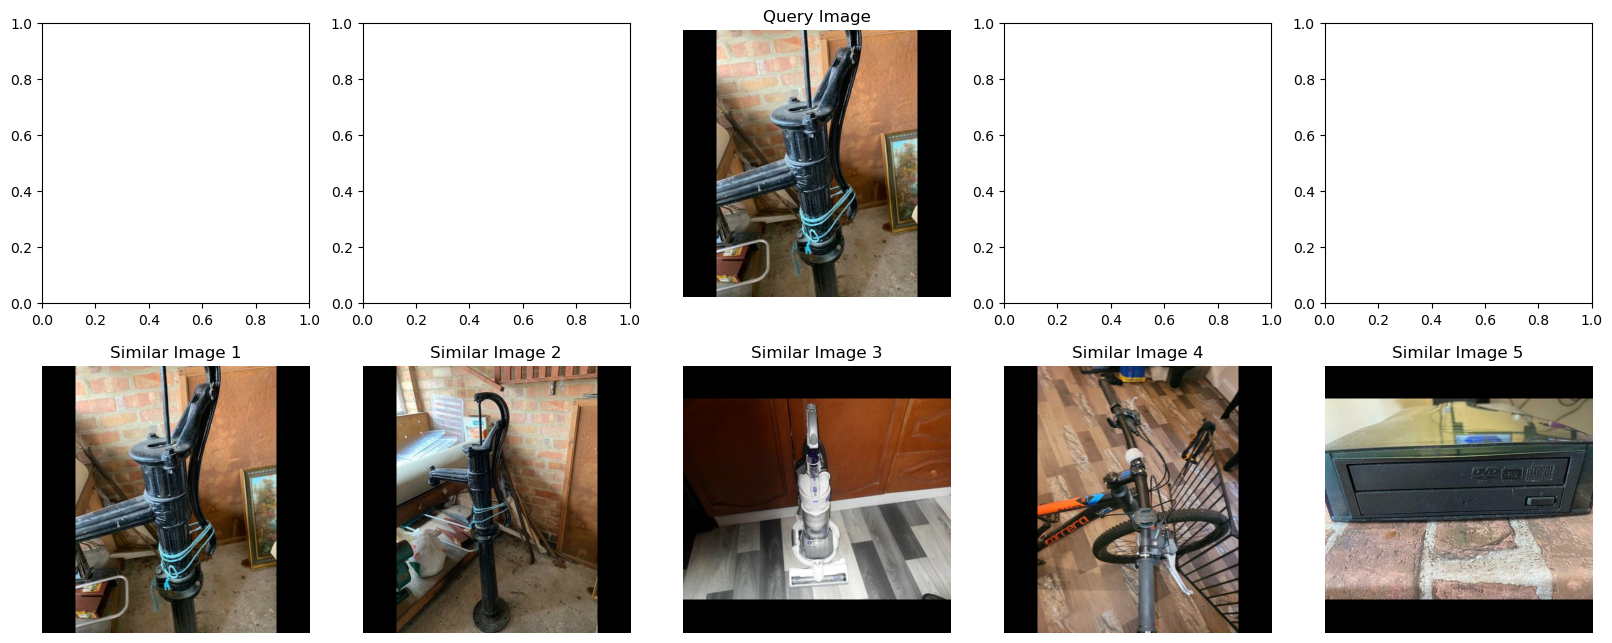

In [20]:
query_image_id = image_ids[2]
query_embedding = embeddings[2]
similar_image_ids = search_similar_images(query_embedding, index, k=5)
print(f"Query Image ID: {query_image_id}")
print(f"Similar Image IDs: {similar_image_ids}")

# display the results
display_similar_images(query_image_id, similar_image_ids, cleaned_img_dir)

### Example 2

Query Image ID: 5e8d17b2-f8e7-403b-bbb1-fa8dfdd3ae6a
Similar Image IDs: ['5e8d17b2-f8e7-403b-bbb1-fa8dfdd3ae6a', '2c2b3a6f-15b3-4289-937a-15482d9f5781', '56a39a46-ab42-4cf6-9abc-031edd509cbd', 'f959e733-3b0e-4f51-b39d-a1a55b73f4af', 'acf77f23-80b6-4974-86da-8a33a9c05bbd']


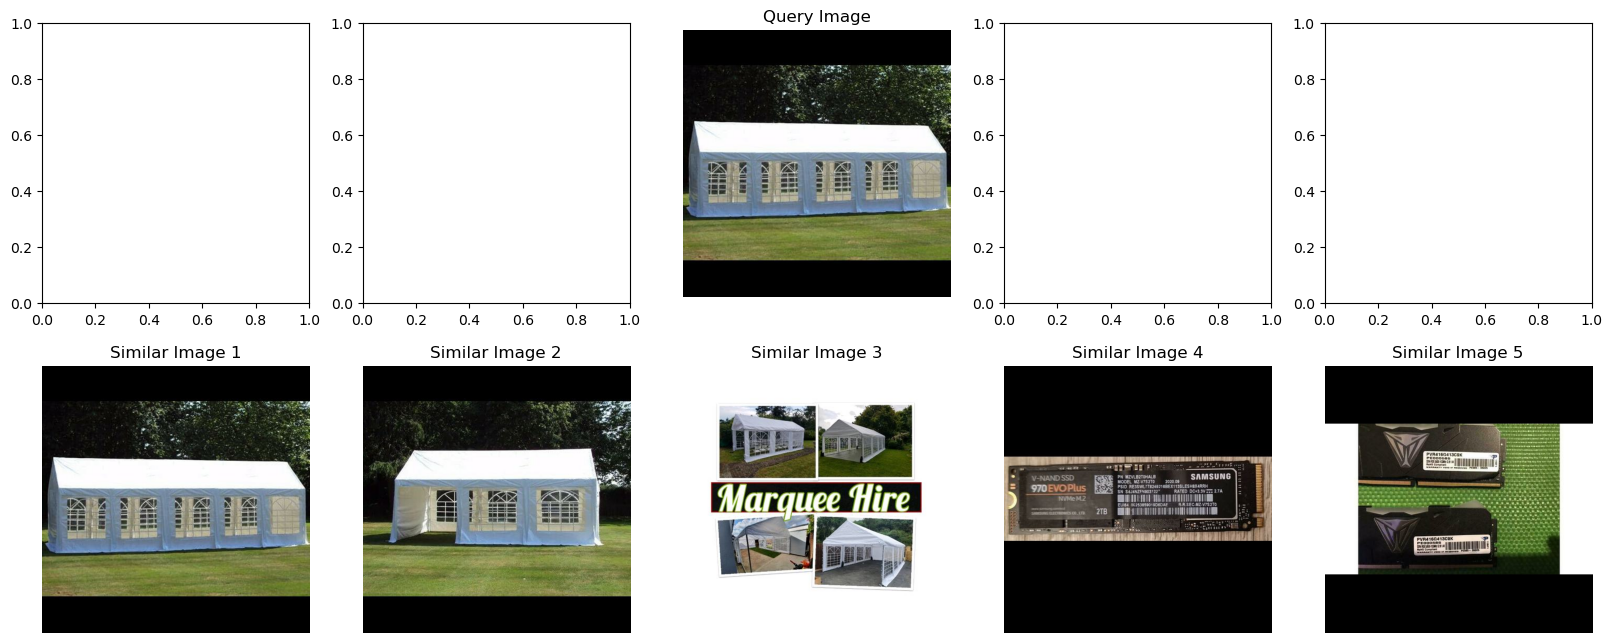

In [17]:
query_image_id = image_ids[5]
query_embedding = embeddings[5]
similar_image_ids = search_similar_images(query_embedding, index, k=5)
print(f"Query Image ID: {query_image_id}")
print(f"Similar Image IDs: {similar_image_ids}")

# display the results
display_similar_images(query_image_id, similar_image_ids, cleaned_img_dir)

### Example 3

Query Image ID: 0e3cb4a4-aae3-49a1-bcf4-1649b26cdcb2
Similar Image IDs: ['0e3cb4a4-aae3-49a1-bcf4-1649b26cdcb2', 'daf23992-5468-4071-96a1-fb39da6b6374', '5651e793-0e91-445f-96f3-862c5a15abe4', '8fb122e8-95ff-4ed3-9b93-7c9359c6c254', '0bc4ac4e-09c2-4a75-9694-051b9ecf731f']


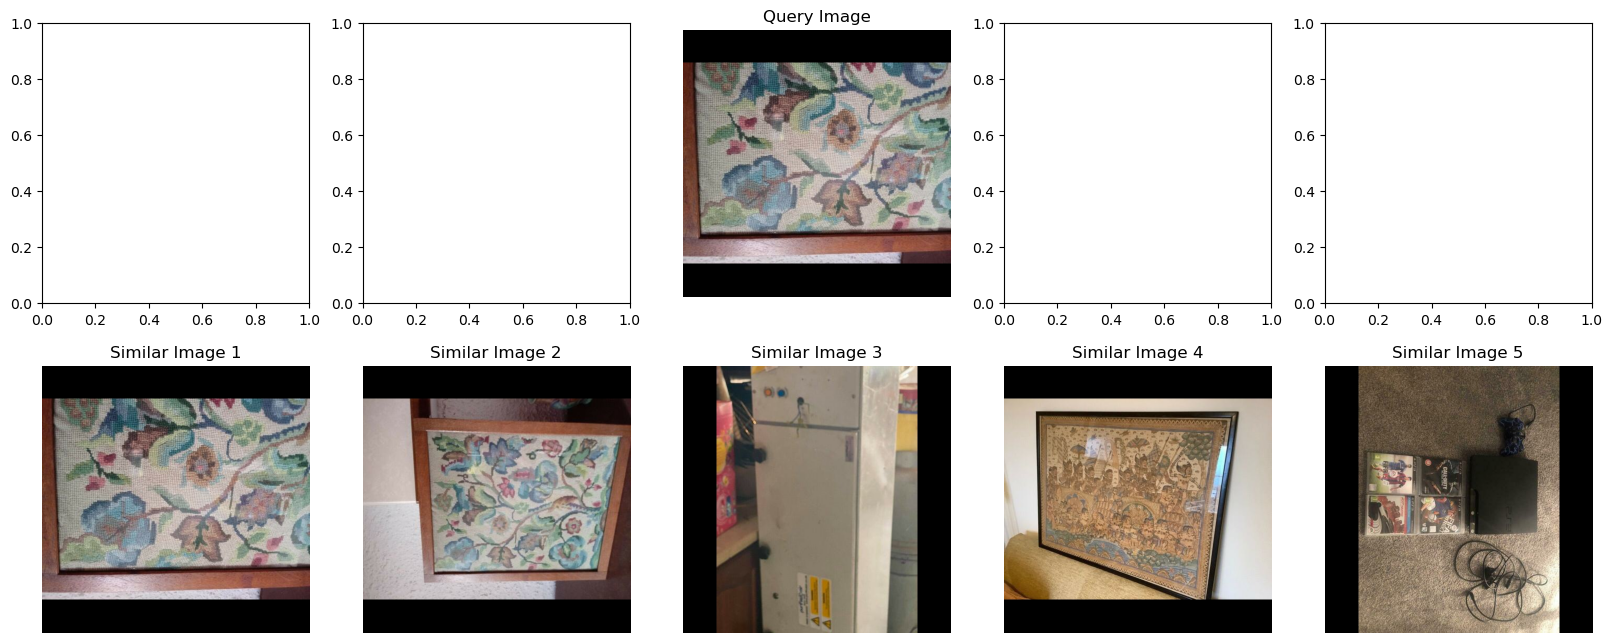

In [18]:
query_image_id = image_ids[100]
query_embedding = embeddings[100]
similar_image_ids = search_similar_images(query_embedding, index, k=5)
print(f"Query Image ID: {query_image_id}")
print(f"Similar Image IDs: {similar_image_ids}")

# display the results
display_similar_images(query_image_id, similar_image_ids, cleaned_img_dir)

### Example 4

Query Image ID: 3be0ba66-0732-4399-8390-6bcf096421e1
Similar Image IDs: ['3be0ba66-0732-4399-8390-6bcf096421e1', 'ff0e9c8d-9890-46b3-87f1-11114a8a034b', 'a9bee305-9ca3-494c-9095-a5564e373a93', 'f4610d7a-496a-4464-b7bb-a440f4af5536', 'd58c2f00-007b-4239-88d9-0185a1c381ee']


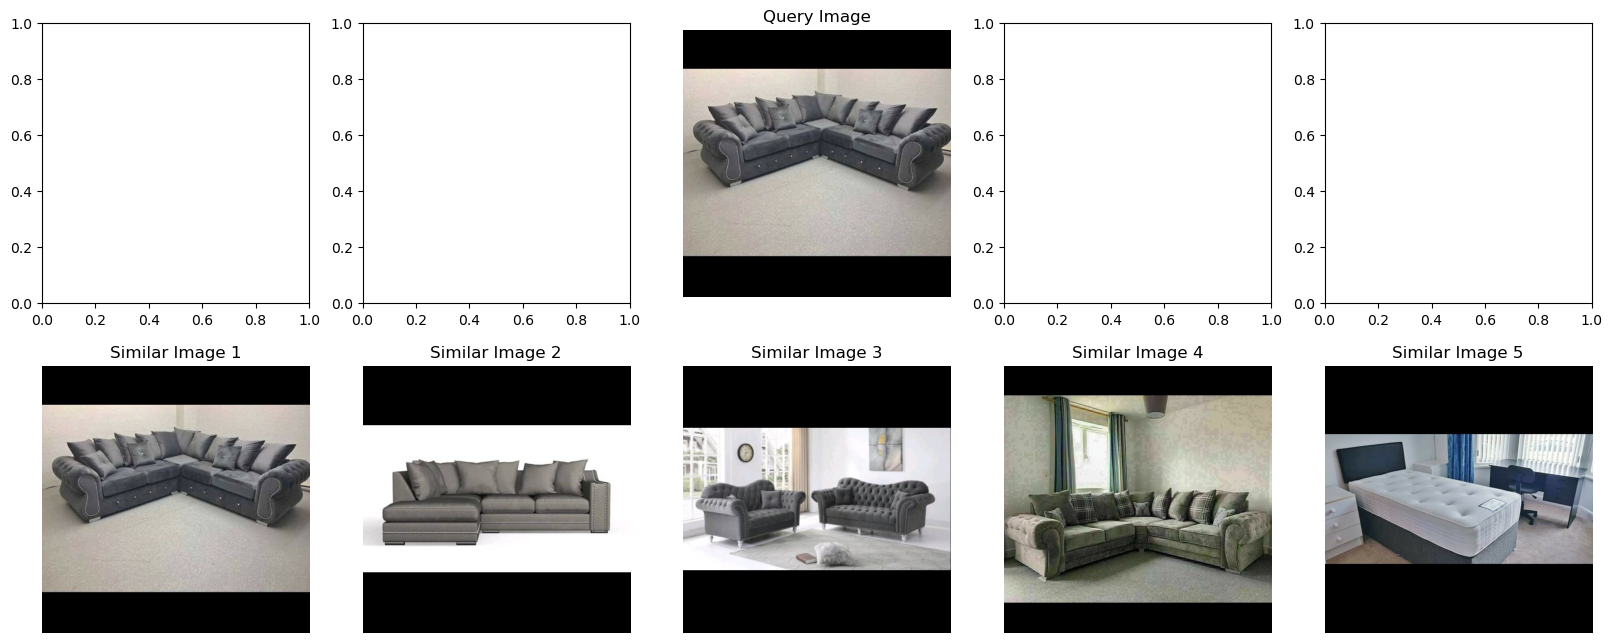

In [21]:
query_image_id = image_ids[500]
query_embedding = embeddings[500]
similar_image_ids = search_similar_images(query_embedding, index, k=5)
print(f"Query Image ID: {query_image_id}")
print(f"Similar Image IDs: {similar_image_ids}")

# display the results
display_similar_images(query_image_id, similar_image_ids, cleaned_img_dir)